# End-to-End Regression Project

## Import libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df = pd.read_csv("./data/housing.csv")

In [3]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

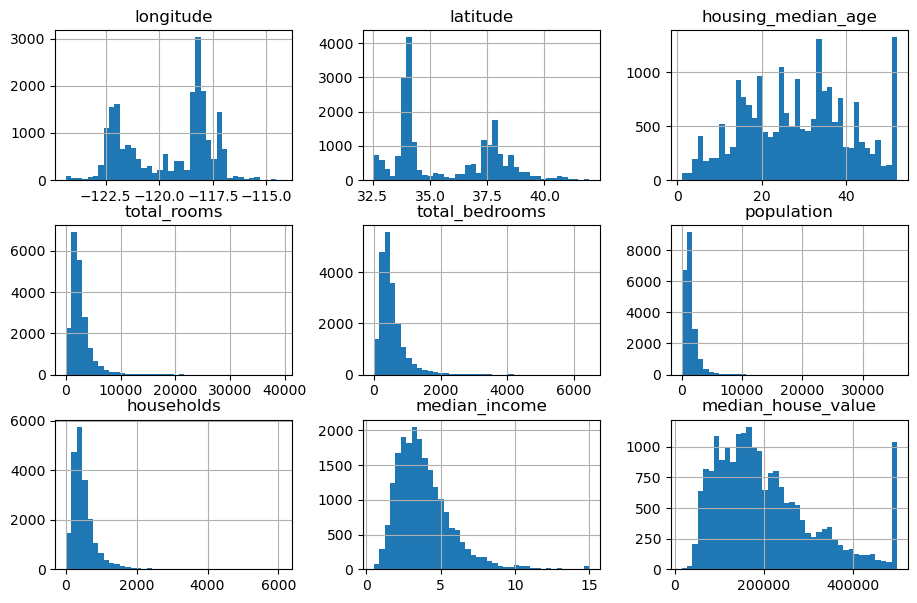

In [8]:
df.hist(bins=40, figsize=(11, 7));

## Test set and Test set

In [9]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [10]:
def shuffle_and_split_df(df: pd.DataFrame, test_ratio: float):
    np.random.seed(42)
    random_indices = np.random.permutation(len(df))
    test_set_size = int(len(df) * test_ratio)
    test_random_indices = random_indices[:test_set_size]
    train_random_indices = random_indices[test_set_size:]

    return df.iloc[train_random_indices], df.iloc[test_random_indices]

In [11]:
train_set, test_set = shuffle_and_split_df(df, 0.2)

In [12]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  households  median_income  median_house_value  \
14196      2300.0       623.0         3.2596            103000.0   
8267       1314.0       756.0         3.8125            382100.0   
17445       915.0       336.0         4.1563            172600.0   
14265      1418.0       355.0         1.9425             93400.0   
2271        874.0       380.0         3.5542             96500.0   
...           ...         ...            ...                 ...   
11284       658.0       217.0         6.3700            229200.0   
11964      1753.0       449.0         3.0500             97800.0   
5390       1756.0       527.0         2.9344            222100.0   
860        1777.0       559.0         5.7192            283500.0   
15795      2619.0      1242.0         2.5755            325000.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445      NEAR OCEAN  
14265      NEAR OCEAN  
2271           INLAND  
...               ...  
11284       <1H OCEAN  
11964          INLAND  
5390        <1H OCEAN  
860         <1H OCEAN  
15795        NEAR BAY  

[16512 rows x 10 columns]

In [13]:
test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   
...          ...       ...                 ...          ...             ...   
15362    -117.22     33.36                16.0       3165.0           482.0   
16623    -120.83     35.36                28.0       4323.0           886.0   
18086    -122.05     37.31                25.0       4111.0           538.0   
2144     -119.76     36.77                36.0       2507.0           466.0   
3665     -118.37     34.22                17.0       1787.0           463.0   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   
...           ...         ...            ...                 ...   
15362      1351.0       452.0         4.6050            263300.0   
16623      1650.0       705.0         2.7266            266800.0   
18086      1585.0       568.0         9.2298            500001.0   
2144       1227.0       474.0         2.7850             72300.0   
3665       1671.0       448.0         3.5521            151500.0   

      ocean_proximity  
20046          INLAND  
3024           INLAND  
15663        NEAR BAY  
20484       <1H OCEAN  
9814       NEAR OCEAN  
...               ...  
15362       <1H OCEAN  
16623      NEAR OCEAN  
18086       <1H OCEAN  
2144           INLAND  
3665        <1H OCEAN  

[4128 rows x 10 columns]

In [14]:
from zlib import crc32  # Cycling Redundancy Check

In [15]:
crc32(np.int64(10))

4108501921

In [16]:
def is_identifier_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2 ** 32

In [17]:
def split_train_test_with_identifier_hash(df, test_ratio, identifier_column):
    identifiers = df[identifier_column]
    in_test_set = identifiers.apply(lambda id_: is_identifier_in_test_set(id_, test_ratio))
    return df.loc[~in_test_set], df.loc[in_test_set]

In [18]:
train_set, test_set = split_train_test_with_identifier_hash(df.reset_index(), 0.2, "index")

In [19]:
train_set

index  longitude  latitude  housing_median_age  total_rooms  \
0          0    -122.23     37.88                41.0        880.0   
1          1    -122.22     37.86                21.0       7099.0   
3          3    -122.25     37.85                52.0       1274.0   
4          4    -122.25     37.85                52.0       1627.0   
6          6    -122.25     37.84                52.0       2535.0   
...      ...        ...       ...                 ...          ...   
20635  20635    -121.09     39.48                25.0       1665.0   
20636  20636    -121.21     39.49                18.0        697.0   
20637  20637    -121.22     39.43                17.0       2254.0   
20638  20638    -121.32     39.43                18.0       1860.0   
20639  20639    -121.24     39.37                16.0       2785.0   

       total_bedrooms  population  households  median_income  \
0               129.0       322.0       126.0         8.3252   
1              1106.0      2401.0      1138.0         8.3014   
3               235.0       558.0       219.0         5.6431   
4               280.0       565.0       259.0         3.8462   
6               489.0      1094.0       514.0         3.6591   
...               ...         ...         ...            ...   
20635           374.0       845.0       330.0         1.5603   
20636           150.0       356.0       114.0         2.5568   
20637           485.0      1007.0       433.0         1.7000   
20638           409.0       741.0       349.0         1.8672   
20639           616.0      1387.0       530.0         2.3886   

       median_house_value ocean_proximity  
0                452600.0        NEAR BAY  
1                358500.0        NEAR BAY  
3                341300.0        NEAR BAY  
4                342200.0        NEAR BAY  
6                299200.0        NEAR BAY  
...                   ...             ...  
20635             78100.0          INLAND  
20636             77100.0          INLAND  
20637             92300.0          INLAND  
20638             84700.0          INLAND  
20639             89400.0          INLAND  

[16512 rows x 11 columns]

In [20]:
test_set

index  longitude  latitude  housing_median_age  total_rooms  \
2          2    -122.24     37.85                52.0       1467.0   
5          5    -122.25     37.85                52.0        919.0   
12        12    -122.26     37.85                52.0       2491.0   
16        16    -122.27     37.85                52.0       1966.0   
23        23    -122.27     37.84                52.0       1688.0   
...      ...        ...       ...                 ...          ...   
20615  20615    -121.54     39.08                23.0       1076.0   
20617  20617    -121.53     39.06                20.0        561.0   
20622  20622    -121.44     39.00                20.0        755.0   
20626  20626    -121.43     39.18                36.0       1124.0   
20629  20629    -121.39     39.12                28.0      10035.0   

       total_bedrooms  population  households  median_income  \
2               190.0       496.0       177.0         7.2574   
5               213.0       413.0       193.0         4.0368   
12              474.0      1098.0       468.0         3.0750   
16              347.0       793.0       331.0         2.7750   
23              337.0       853.0       325.0         2.1806   
...               ...         ...         ...            ...   
20615           216.0       724.0       197.0         2.3598   
20617           109.0       308.0       114.0         3.3021   
20622           147.0       457.0       157.0         2.4167   
20626           184.0       504.0       171.0         2.1667   
20629          1856.0      6912.0      1818.0         2.0943   

       median_house_value ocean_proximity  
2                352100.0        NEAR BAY  
5                269700.0        NEAR BAY  
12               213500.0        NEAR BAY  
16               152500.0        NEAR BAY  
23                99700.0        NEAR BAY  
...                   ...             ...  
20615             57500.0          INLAND  
20617             70800.0          INLAND  
20622             67000.0          INLAND  
20626             93800.0          INLAND  
20629            108300.0          INLAND  

[4128 rows x 11 columns]

In [21]:
df_with_identifier = df
df_with_identifier['identifier'] = df['longitude'] * 1000 + df['latitude']
df_with_identifier.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   identifier  
0  -122192.12  
1  -122182.14  
2  -122202.15  
3  -122212.15  
4  -122212.15

In [22]:
train_set, test_set = split_train_test_with_identifier_hash(df_with_identifier, 0.2, "identifier")

In [23]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  identifier  
0            NEAR BAY  -122192.12  
1            NEAR BAY  -122182.14  
2            NEAR BAY  -122202.15  
3            NEAR BAY  -122212.15  
4            NEAR BAY  -122212.15  
...               ...         ...  
20635          INLAND  -121050.52  
20636          INLAND  -121170.51  
20637          INLAND  -121180.57  
20638          INLAND  -121280.57  
20639          INLAND  -121200.63  

[16322 rows x 11 columns]

In [24]:
test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
59       -122.29     37.82                 2.0        158.0            43.0   
60       -122.29     37.83                52.0       1121.0           211.0   
61       -122.29     37.82                49.0        135.0            29.0   
62       -122.29     37.81                50.0        760.0           190.0   
67       -122.29     37.80                52.0       1027.0           244.0   
...          ...       ...                 ...          ...             ...   
20616    -121.53     39.08                15.0       1810.0           441.0   
20617    -121.53     39.06                20.0        561.0           109.0   
20618    -121.55     39.06                25.0       1332.0           247.0   
20632    -121.45     39.26                15.0       2319.0           416.0   
20633    -121.53     39.19                27.0       2080.0           412.0   

       population  households  median_income  median_house_value  \
59           94.0        57.0         2.5625             60000.0   
60          554.0       187.0         3.3929             75700.0   
61           86.0        23.0         6.1183             75000.0   
62          377.0       122.0         0.9011             86100.0   
67          492.0       147.0         2.6094             81300.0   
...           ...         ...            ...                 ...   
20616      1157.0       375.0         2.0469             55100.0   
20617       308.0       114.0         3.3021             70800.0   
20618       726.0       226.0         2.2500             63400.0   
20632      1047.0       385.0         3.1250            115600.0   
20633      1082.0       382.0         2.5495             98300.0   

      ocean_proximity  identifier  
59           NEAR BAY  -122252.18  
60           NEAR BAY  -122252.17  
61           NEAR BAY  -122252.18  
62           NEAR BAY  -122252.19  
67           NEAR BAY  -122252.20  
...               ...         ...  
20616          INLAND  -121490.92  
20617          INLAND  -121490.94  
20618          INLAND  -121510.94  
20632          INLAND  -121410.74  
20633          INLAND  -121490.81  

[4318 rows x 11 columns]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=40)

In [27]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
9226     -120.04     36.93                11.0       3606.0           699.0   
11826    -121.04     39.00                21.0       4059.0           730.0   
4553     -118.24     34.06                33.0        390.0           199.0   
10787    -117.92     33.64                25.0       2224.0           580.0   
4104     -118.35     34.13                39.0       1610.0           278.0   
...          ...       ...                 ...          ...             ...   
11532    -118.09     33.77                26.0       5359.0          1508.0   
16065    -122.48     37.75                49.0       2203.0           407.0   
14501    -117.23     32.86                16.0       1200.0           468.0   
14555    -117.13     32.96                15.0       2267.0           292.0   
11590    -118.01     33.78                26.0       2343.0           377.0   

       population  households  median_income  median_house_value  \
9226       2074.0       644.0         2.6941             63300.0   
11826      1874.0       693.0         4.8051            174300.0   
4553        435.0       193.0         1.1979            350000.0   
10787       985.0       516.0         3.1305            268800.0   
4104        511.0       278.0         4.3333            385900.0   
...           ...         ...            ...                 ...   
11532      1829.0      1393.0         1.7675             61300.0   
16065      1052.0       405.0         4.4375            329200.0   
14501       648.0       443.0         3.0450            100000.0   
14555      1180.0       289.0         6.7120            240200.0   
11590      1166.0       373.0         6.0000            233100.0   

      ocean_proximity  identifier  
9226           INLAND  -120003.07  
11826          INLAND  -121001.00  
4553        <1H OCEAN  -118205.94  
10787       <1H OCEAN  -117886.36  
4104        <1H OCEAN  -118315.87  
...               ...         ...  
11532       <1H OCEAN  -118056.23  
16065        NEAR BAY  -122442.25  
14501      NEAR OCEAN  -117197.14  
14555       <1H OCEAN  -117097.04  
11590       <1H OCEAN  -117976.22  

[16512 rows x 11 columns]

In [28]:
test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6607     -118.14     34.18                47.0       3457.0           622.0   
884      -121.97     37.54                31.0       1949.0           344.0   
9457     -123.84     39.83                19.0       1461.0           340.0   
18681    -121.82     36.86                17.0       1573.0           272.0   
4654     -118.33     34.05                48.0       2405.0           527.0   
...          ...       ...                 ...          ...             ...   
19314    -122.87     38.43                36.0       1987.0           387.0   
15433    -117.25     33.20                10.0       2050.0           473.0   
3631     -118.43     34.23                35.0       2049.0           390.0   
3689     -118.36     34.23                15.0       2485.0           742.0   
11895    -117.36     33.97                32.0       1625.0           335.0   

       population  households  median_income  median_house_value  \
6607       1700.0       579.0         3.5164            226500.0   
884         986.0       322.0         4.6349            196200.0   
9457        515.0       227.0         1.5278            145800.0   
18681       142.0        55.0         2.1719            420000.0   
4654       1868.0       502.0         3.3750            257800.0   
...           ...         ...            ...                 ...   
19314      1065.0       347.0         4.0446            172200.0   
15433      1302.0       471.0         2.7961            131300.0   
3631       1286.0       385.0         4.4432            181500.0   
3689       1994.0       670.0         2.8333            183200.0   
11895      1212.0       327.0         2.7596             82200.0   

      ocean_proximity  identifier  
6607        <1H OCEAN  -118105.82  
884         <1H OCEAN  -121932.46  
9457       NEAR OCEAN  -123800.17  
18681      NEAR OCEAN  -121783.14  
4654        <1H OCEAN  -118295.95  
...               ...         ...  
19314       <1H OCEAN  -122831.57  
15433       <1H OCEAN  -117216.80  
3631        <1H OCEAN  -118395.77  
3689        <1H OCEAN  -118325.77  
11895          INLAND  -117326.03  

[4128 rows x 11 columns]

In [29]:
df["median_income_categories"] = pd.cut(
                                    df["median_income"],
                                    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                    labels=[1, 2, 3, 4, 5]
                                )
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  identifier median_income_categories  
0            NEAR BAY  -122192.12                        5  
1            NEAR BAY  -122182.14                        5  
2            NEAR BAY  -122202.15                        5  
3            NEAR BAY  -122212.15                        4  
4            NEAR BAY  -122212.15                        3  
...               ...         ...                      ...  
20635          INLAND  -121050.52                        2  
20636          INLAND  -121170.51                        2  
20637          INLAND  -121180.57                        2  
20638          INLAND  -121280.57                        2  
20639          INLAND  -121200.63                        2  

[20640 rows x 12 columns]

<Axes: >

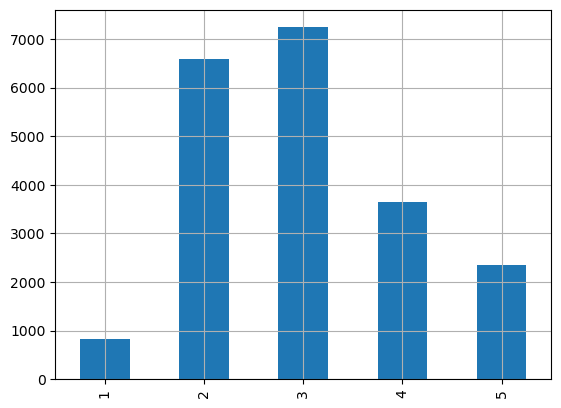

In [30]:
df["median_income_categories"].value_counts().sort_index().plot.bar(grid=True)

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit  # provides train/test indices to split data

In [32]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=40)
stratified_split = []
for train_idx, test_idx in sss.split(df, df["median_income_categories"]):
    stratified_train_set_n = df.iloc[train_idx]
    stratified_test_set_n = df.iloc[test_idx]
    stratified_split.append([stratified_train_set_n, stratified_test_set_n])

In [33]:
stratified_train_set, stratified_test_set = stratified_split[0]

In [34]:
stratified_train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16415    -121.26     37.88                42.0        465.0            93.0   
1279     -121.64     37.85                22.0       1999.0           415.0   
7741     -118.15     33.95                35.0       2753.0           702.0   
4425     -118.24     34.07                27.0        223.0            80.0   
1283     -121.82     38.02                46.0        176.0            43.0   
...          ...       ...                 ...          ...             ...   
1221     -120.65     38.28                21.0       3095.0           681.0   
12640    -121.45     38.53                34.0       1893.0           415.0   
5747     -118.27     34.17                48.0       1560.0           280.0   
16224    -121.33     37.98                36.0       3113.0           576.0   
8967     -118.40     34.00                37.0       1534.0           258.0   

       population  households  median_income  median_house_value  \
16415       256.0        93.0         3.1719            158300.0   
1279        967.0       320.0         4.4583            253900.0   
7741       1592.0       614.0         2.7875            209000.0   
4425        249.0        82.0         1.6136            137500.0   
1283        101.0        40.0         2.2361             93800.0   
...           ...         ...            ...                 ...   
1221       1341.0       546.0         2.1382            104000.0   
12640       884.0       395.0         2.1679             75400.0   
5747        825.0       269.0         5.5118            354700.0   
16224      1746.0       544.0         3.4625             84600.0   
8967        751.0       259.0         5.4440            336000.0   

      ocean_proximity  identifier median_income_categories  
16415          INLAND  -121222.12                        3  
1279           INLAND  -121602.15                        3  
7741        <1H OCEAN  -118116.05                        2  
4425        <1H OCEAN  -118205.93                        2  
1283           INLAND  -121781.98                        2  
...               ...         ...                      ...  
1221           INLAND  -120611.72                        2  
12640          INLAND  -121411.47                        2  
5747        <1H OCEAN  -118235.83                        4  
16224          INLAND  -121292.02                        3  
8967        <1H OCEAN  -118366.00                        4  

[16512 rows x 12 columns]

In [35]:
stratified_test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5905     -118.42     34.29                34.0       1489.0           326.0   
4830     -118.30     34.04                37.0       1470.0           399.0   
10969    -117.87     33.76                37.0       4943.0           851.0   
7048     -118.05     33.94                34.0        495.0           120.0   
13721    -117.18     34.07                 7.0       1347.0           301.0   
...          ...       ...                 ...          ...             ...   
3377     -118.29     34.25                19.0       1988.0           594.0   
19816    -119.29     36.54                18.0       2581.0           628.0   
20545    -121.75     38.55                26.0       4802.0           950.0   
3330     -122.48     38.90                10.0        304.0            63.0   
14222    -117.04     32.66                22.0       3362.0           630.0   

       population  households  median_income  median_house_value  \
5905       1389.0       313.0         3.4821            160300.0   
4830       1579.0       390.0         2.0060            150000.0   
10969      2164.0       788.0         4.1071            311300.0   
7048        527.0       130.0         1.9453            149000.0   
13721       799.0       276.0         2.9485            112500.0   
...           ...         ...            ...                 ...   
3377       1399.0       527.0         2.4727            175000.0   
19816      2732.0       592.0         1.8429             58300.0   
20545      2199.0       939.0         3.7452            227700.0   
3330        161.0        61.0         2.1964            112500.0   
14222      1471.0       612.0         4.1442            303900.0   

      ocean_proximity  identifier median_income_categories  
5905        <1H OCEAN  -118385.71                        3  
4830        <1H OCEAN  -118265.96                        2  
10969       <1H OCEAN  -117836.24                        3  
7048        <1H OCEAN  -118016.06                        2  
13721          INLAND  -117145.93                        2  
...               ...         ...                      ...  
3377        <1H OCEAN  -118255.75                        2  
19816          INLAND  -119253.46                        2  
20545          INLAND  -121711.45                        3  
3330           INLAND  -122441.10                        2  
14222      NEAR OCEAN  -117007.34                        3  

[4128 rows x 12 columns]

In [36]:
stratified_test_set["median_income_categories"].value_counts() / len(stratified_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: median_income_categories, dtype: float64

In [37]:
stratified_train_set["median_income_categories"].value_counts() / len(stratified_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: median_income_categories, dtype: float64

In [38]:
str_train_set, str_test_set = train_test_split(df,
                                               test_size=0.2,
                                               stratify=df["median_income_categories"],
                                               random_state=40)

In [39]:
str_train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16415    -121.26     37.88                42.0        465.0            93.0   
1279     -121.64     37.85                22.0       1999.0           415.0   
7741     -118.15     33.95                35.0       2753.0           702.0   
4425     -118.24     34.07                27.0        223.0            80.0   
1283     -121.82     38.02                46.0        176.0            43.0   
...          ...       ...                 ...          ...             ...   
1221     -120.65     38.28                21.0       3095.0           681.0   
12640    -121.45     38.53                34.0       1893.0           415.0   
5747     -118.27     34.17                48.0       1560.0           280.0   
16224    -121.33     37.98                36.0       3113.0           576.0   
8967     -118.40     34.00                37.0       1534.0           258.0   

       population  households  median_income  median_house_value  \
16415       256.0        93.0         3.1719            158300.0   
1279        967.0       320.0         4.4583            253900.0   
7741       1592.0       614.0         2.7875            209000.0   
4425        249.0        82.0         1.6136            137500.0   
1283        101.0        40.0         2.2361             93800.0   
...           ...         ...            ...                 ...   
1221       1341.0       546.0         2.1382            104000.0   
12640       884.0       395.0         2.1679             75400.0   
5747        825.0       269.0         5.5118            354700.0   
16224      1746.0       544.0         3.4625             84600.0   
8967        751.0       259.0         5.4440            336000.0   

      ocean_proximity  identifier median_income_categories  
16415          INLAND  -121222.12                        3  
1279           INLAND  -121602.15                        3  
7741        <1H OCEAN  -118116.05                        2  
4425        <1H OCEAN  -118205.93                        2  
1283           INLAND  -121781.98                        2  
...               ...         ...                      ...  
1221           INLAND  -120611.72                        2  
12640          INLAND  -121411.47                        2  
5747        <1H OCEAN  -118235.83                        4  
16224          INLAND  -121292.02                        3  
8967        <1H OCEAN  -118366.00                        4  

[16512 rows x 12 columns]

In [40]:
str_test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5905     -118.42     34.29                34.0       1489.0           326.0   
4830     -118.30     34.04                37.0       1470.0           399.0   
10969    -117.87     33.76                37.0       4943.0           851.0   
7048     -118.05     33.94                34.0        495.0           120.0   
13721    -117.18     34.07                 7.0       1347.0           301.0   
...          ...       ...                 ...          ...             ...   
3377     -118.29     34.25                19.0       1988.0           594.0   
19816    -119.29     36.54                18.0       2581.0           628.0   
20545    -121.75     38.55                26.0       4802.0           950.0   
3330     -122.48     38.90                10.0        304.0            63.0   
14222    -117.04     32.66                22.0       3362.0           630.0   

       population  households  median_income  median_house_value  \
5905       1389.0       313.0         3.4821            160300.0   
4830       1579.0       390.0         2.0060            150000.0   
10969      2164.0       788.0         4.1071            311300.0   
7048        527.0       130.0         1.9453            149000.0   
13721       799.0       276.0         2.9485            112500.0   
...           ...         ...            ...                 ...   
3377       1399.0       527.0         2.4727            175000.0   
19816      2732.0       592.0         1.8429             58300.0   
20545      2199.0       939.0         3.7452            227700.0   
3330        161.0        61.0         2.1964            112500.0   
14222      1471.0       612.0         4.1442            303900.0   

      ocean_proximity  identifier median_income_categories  
5905        <1H OCEAN  -118385.71                        3  
4830        <1H OCEAN  -118265.96                        2  
10969       <1H OCEAN  -117836.24                        3  
7048        <1H OCEAN  -118016.06                        2  
13721          INLAND  -117145.93                        2  
...               ...         ...                      ...  
3377        <1H OCEAN  -118255.75                        2  
19816          INLAND  -119253.46                        2  
20545          INLAND  -121711.45                        3  
3330           INLAND  -122441.10                        2  
14222      NEAR OCEAN  -117007.34                        3  

[4128 rows x 12 columns]

In [41]:
str_test_set["median_income_categories"].value_counts() / len(str_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: median_income_categories, dtype: float64

In [42]:
str_train_set["median_income_categories"].value_counts() / len(str_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: median_income_categories, dtype: float64

In [43]:
str_train_set = str_train_set.drop("median_income_categories", axis=1)
str_test_set = str_test_set.drop("median_income_categories", axis=1)

In [44]:
str_test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5905     -118.42     34.29                34.0       1489.0           326.0   
4830     -118.30     34.04                37.0       1470.0           399.0   
10969    -117.87     33.76                37.0       4943.0           851.0   
7048     -118.05     33.94                34.0        495.0           120.0   
13721    -117.18     34.07                 7.0       1347.0           301.0   
...          ...       ...                 ...          ...             ...   
3377     -118.29     34.25                19.0       1988.0           594.0   
19816    -119.29     36.54                18.0       2581.0           628.0   
20545    -121.75     38.55                26.0       4802.0           950.0   
3330     -122.48     38.90                10.0        304.0            63.0   
14222    -117.04     32.66                22.0       3362.0           630.0   

       population  households  median_income  median_house_value  \
5905       1389.0       313.0         3.4821            160300.0   
4830       1579.0       390.0         2.0060            150000.0   
10969      2164.0       788.0         4.1071            311300.0   
7048        527.0       130.0         1.9453            149000.0   
13721       799.0       276.0         2.9485            112500.0   
...           ...         ...            ...                 ...   
3377       1399.0       527.0         2.4727            175000.0   
19816      2732.0       592.0         1.8429             58300.0   
20545      2199.0       939.0         3.7452            227700.0   
3330        161.0        61.0         2.1964            112500.0   
14222      1471.0       612.0         4.1442            303900.0   

      ocean_proximity  identifier  
5905        <1H OCEAN  -118385.71  
4830        <1H OCEAN  -118265.96  
10969       <1H OCEAN  -117836.24  
7048        <1H OCEAN  -118016.06  
13721          INLAND  -117145.93  
...               ...         ...  
3377        <1H OCEAN  -118255.75  
19816          INLAND  -119253.46  
20545          INLAND  -121711.45  
3330           INLAND  -122441.10  
14222      NEAR OCEAN  -117007.34  

[4128 rows x 11 columns]

## Visualize

In [45]:
train = str_train_set

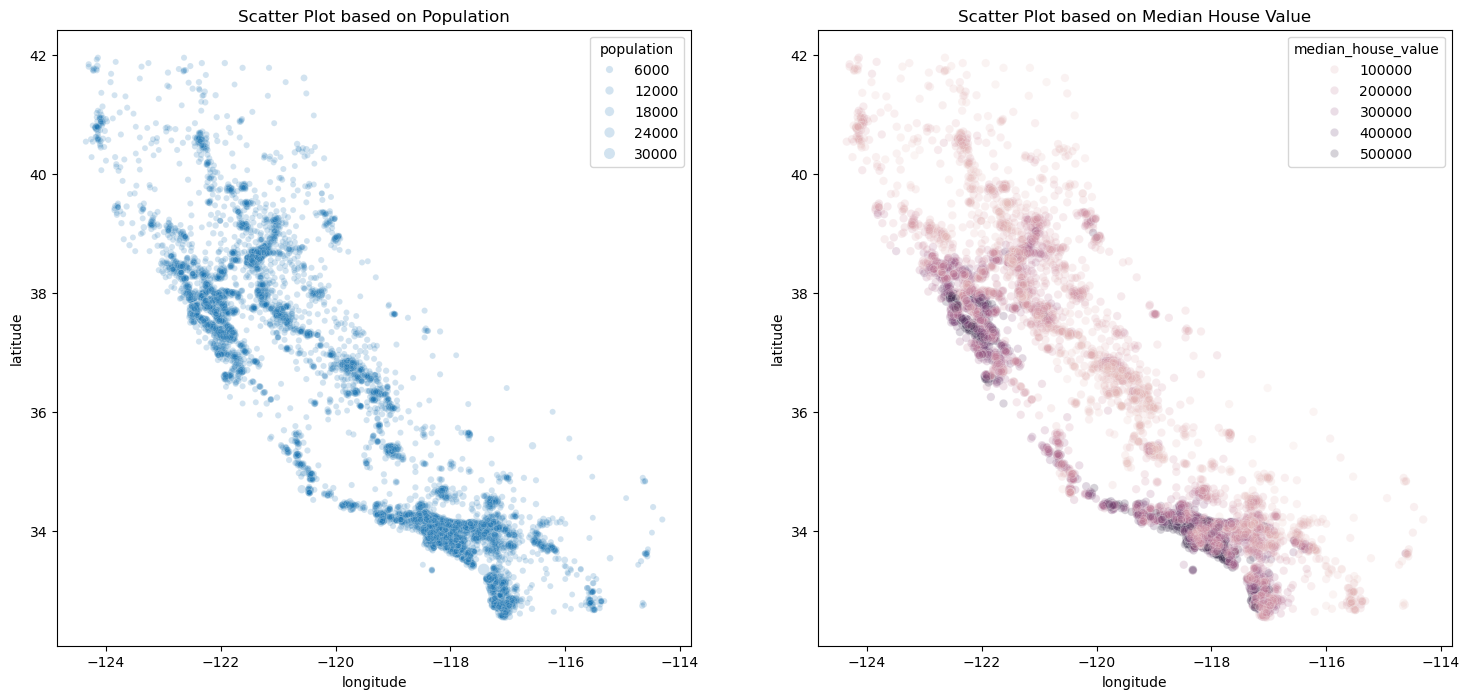

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(data=train,
                x="longitude",
                y="latitude",
                size="population",
                alpha=0.2,
                ax=ax[0])
ax[0].set_title("Scatter Plot based on Population")

# sns.move_legend(ax[0], "upper left", bbox_to_anchor=(1, 1))   # for moving legend

sns.scatterplot(data=train,
                x="longitude",
                y="latitude",
                hue="median_house_value",
                alpha=0.2,
                ax=ax[1])
ax[1].set_title("Scatter Plot based on Median House Value");

In [47]:
fig.savefig("./out/scatter_plot.png", dpi=300)

## Correlation

In [48]:
train.corr(numeric_only=True)['median_house_value']

longitude            -0.051167
latitude             -0.137691
housing_median_age    0.105329
total_rooms           0.138007
total_bedrooms        0.052814
population           -0.021544
households            0.070014
median_income         0.686865
median_house_value    1.000000
identifier           -0.051364
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

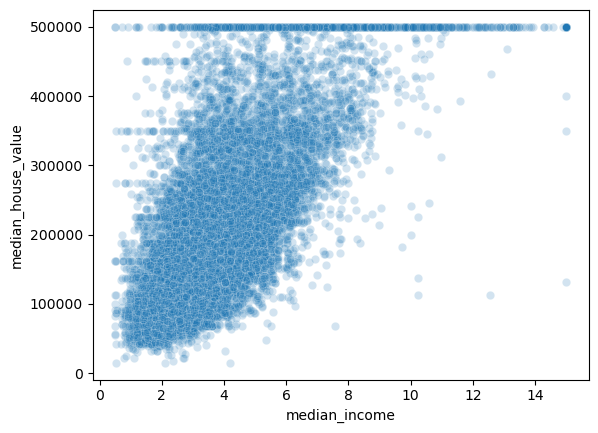

In [49]:
sns.scatterplot(data=train,
                x="median_income",
                y="median_house_value",
                alpha=0.2)

## Attribute Combination

In [50]:
train["rooms_per_house"] = train["total_rooms"] / train["households"]
train["bedrooms_ratio"] = train["total_bedrooms"] / train["total_rooms"]
train["people_per_house"] = train["population"] / train["households"]
train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16415    -121.26     37.88                42.0        465.0            93.0   
1279     -121.64     37.85                22.0       1999.0           415.0   
7741     -118.15     33.95                35.0       2753.0           702.0   
4425     -118.24     34.07                27.0        223.0            80.0   
1283     -121.82     38.02                46.0        176.0            43.0   

       population  households  median_income  median_house_value  \
16415       256.0        93.0         3.1719            158300.0   
1279        967.0       320.0         4.4583            253900.0   
7741       1592.0       614.0         2.7875            209000.0   
4425        249.0        82.0         1.6136            137500.0   
1283        101.0        40.0         2.2361             93800.0   

      ocean_proximity  identifier  rooms_per_house  bedrooms_ratio  \
16415          INLAND  -121222.12         5.000000        0.200000   
1279           INLAND  -121602.15         6.246875        0.207604   
7741        <1H OCEAN  -118116.05         4.483713        0.254995   
4425        <1H OCEAN  -118205.93         2.719512        0.358744   
1283           INLAND  -121781.98         4.400000        0.244318   

       people_per_house  
16415          2.752688  
1279           3.021875  
7741           2.592834  
4425           3.036585  
1283           2.525000

In [51]:
train.corr(numeric_only=True)['median_house_value']

longitude            -0.051167
latitude             -0.137691
housing_median_age    0.105329
total_rooms           0.138007
total_bedrooms        0.052814
population           -0.021544
households            0.070014
median_income         0.686865
median_house_value    1.000000
identifier           -0.051364
rooms_per_house       0.159500
bedrooms_ratio       -0.255178
people_per_house     -0.027110
Name: median_house_value, dtype: float64

## Prepare Data

In [52]:
train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16415    -121.26     37.88                42.0        465.0            93.0   
1279     -121.64     37.85                22.0       1999.0           415.0   
7741     -118.15     33.95                35.0       2753.0           702.0   
4425     -118.24     34.07                27.0        223.0            80.0   
1283     -121.82     38.02                46.0        176.0            43.0   
...          ...       ...                 ...          ...             ...   
1221     -120.65     38.28                21.0       3095.0           681.0   
12640    -121.45     38.53                34.0       1893.0           415.0   
5747     -118.27     34.17                48.0       1560.0           280.0   
16224    -121.33     37.98                36.0       3113.0           576.0   
8967     -118.40     34.00                37.0       1534.0           258.0   

       population  households  median_income  median_house_value  \
16415       256.0        93.0         3.1719            158300.0   
1279        967.0       320.0         4.4583            253900.0   
7741       1592.0       614.0         2.7875            209000.0   
4425        249.0        82.0         1.6136            137500.0   
1283        101.0        40.0         2.2361             93800.0   
...           ...         ...            ...                 ...   
1221       1341.0       546.0         2.1382            104000.0   
12640       884.0       395.0         2.1679             75400.0   
5747        825.0       269.0         5.5118            354700.0   
16224      1746.0       544.0         3.4625             84600.0   
8967        751.0       259.0         5.4440            336000.0   

      ocean_proximity  identifier  rooms_per_house  bedrooms_ratio  \
16415          INLAND  -121222.12         5.000000        0.200000   
1279           INLAND  -121602.15         6.246875        0.207604   
7741        <1H OCEAN  -118116.05         4.483713        0.254995   
4425        <1H OCEAN  -118205.93         2.719512        0.358744   
1283           INLAND  -121781.98         4.400000        0.244318   
...               ...         ...              ...             ...   
1221           INLAND  -120611.72         5.668498        0.220032   
12640          INLAND  -121411.47         4.792405        0.219229   
5747        <1H OCEAN  -118235.83         5.799257        0.179487   
16224          INLAND  -121292.02         5.722426        0.185031   
8967        <1H OCEAN  -118366.00         5.922780        0.168188   

       people_per_house  
16415          2.752688  
1279           3.021875  
7741           2.592834  
4425           3.036585  
1283           2.525000  
...                 ...  
1221           2.456044  
12640          2.237975  
5747           3.066914  
16224          3.209559  
8967           2.899614  

[16512 rows x 14 columns]

In [53]:
train_features = train.drop("median_house_value", axis=1)
train_target = train["median_house_value"]
train_target

16415    158300.0
1279     253900.0
7741     209000.0
4425     137500.0
1283      93800.0
           ...   
1221     104000.0
12640     75400.0
5747     354700.0
16224     84600.0
8967     336000.0
Name: median_house_value, Length: 16512, dtype: float64

### Data Cleaning

In [54]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16415 to 8967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16344 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [55]:
# removes rows with na values
train_features.dropna(subset=["total_bedrooms"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16344 entries, 16415 to 8967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16344 non-null  float64
 1   latitude            16344 non-null  float64
 2   housing_median_age  16344 non-null  float64
 3   total_rooms         16344 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16344 non-null  float64
 6   households          16344 non-null  float64
 7   median_income       16344 non-null  float64
 8   ocean_proximity     16344 non-null  object 
 9   identifier          16344 non-null  float64
 10  rooms_per_house     16344 non-null  float64
 11  bedrooms_ratio      16344 non-null  float64
 12  people_per_house    16344 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.7+ MB


In [56]:
# remove columns with na values
train_features.drop(["total_bedrooms", "bedrooms_ratio"], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16415 to 8967
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   population          16512 non-null  float64
 5   households          16512 non-null  float64
 6   median_income       16512 non-null  float64
 7   ocean_proximity     16512 non-null  object 
 8   identifier          16512 non-null  float64
 9   rooms_per_house     16512 non-null  float64
 10  people_per_house    16512 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.5+ MB


In [57]:
# train_features_with_imputer_na_values
total_bedrooms_median = train_features["total_bedrooms"].median()
train_features["total_bedrooms"].fillna(total_bedrooms_median, inplace=True)

In [58]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16415 to 8967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16344 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [59]:
train_features["bedrooms_ratio"] = train_features["total_bedrooms"] / train_features["total_rooms"]

In [60]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16415 to 8967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16512 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


## Sklearn Impute

In [61]:
from sklearn.impute import SimpleImputer

In [62]:
simple_imputer = SimpleImputer(strategy="median")

In [63]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16415 to 8967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16512 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [64]:
train_features = train.drop("median_house_value", axis=1)

In [65]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16415 to 8967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16344 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [66]:
train_features_numeric = train_features.select_dtypes(include=[np.number])
train_features_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16415 to 8967
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   identifier          16512 non-null  float64
 9   rooms_per_house     16512 non-null  float64
 10  bedrooms_ratio      16344 non-null  float64
 11  people_per_house    16512 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


In [67]:
simple_imputer.fit(train_features_numeric)

SimpleImputer(strategy='median')

In [68]:
simple_imputer.statistics_  # median of each columns

array([-1.18480000e+02,  3.42500000e+01,  2.90000000e+01,  2.12900000e+03,
        4.36000000e+02,  1.16800000e+03,  4.11000000e+02,  3.53410000e+00,
       -1.18445990e+05,  5.22483203e+00,  2.03423233e-01,  2.82065903e+00])

In [69]:
train_features_numeric.median().values

array([-1.18480000e+02,  3.42500000e+01,  2.90000000e+01,  2.12900000e+03,
        4.36000000e+02,  1.16800000e+03,  4.11000000e+02,  3.53410000e+00,
       -1.18445990e+05,  5.22483203e+00,  2.03423233e-01,  2.82065903e+00])

In [70]:
simple_imputer.transform(train_features_numeric).shape

(16512, 12)

In [71]:
train_features_numeric = pd.DataFrame(simple_imputer.transform(train_features_numeric),
                                      columns=train_features_numeric.columns,
                                      index=train_features_numeric.index)

In [72]:
train_features_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16415 to 8967
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   identifier          16512 non-null  float64
 9   rooms_per_house     16512 non-null  float64
 10  bedrooms_ratio      16512 non-null  float64
 11  people_per_house    16512 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


## Sklearn Encoder

In [73]:
# categorical features
train_features[["ocean_proximity"]].value_counts()

ocean_proximity
<1H OCEAN          7324
INLAND             5213
NEAR OCEAN         2126
NEAR BAY           1844
ISLAND                5
dtype: int64

In [74]:
train_features_categorical = train_features[["ocean_proximity"]]

In [75]:
from sklearn.preprocessing import OrdinalEncoder

In [76]:
oe = OrdinalEncoder()
ocean_proximity_index = oe.fit_transform(train_features_categorical)
ocean_proximity_index

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [77]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [78]:
np.unique(ocean_proximity_index)

array([0., 1., 2., 3., 4.])

In [79]:
from sklearn.preprocessing import OneHotEncoder

In [80]:
ohe = OneHotEncoder()
ocean_proximity_ohe = ohe.fit_transform(train_features_categorical)

In [81]:
ocean_proximity_ohe.toarray(), ocean_proximity_ohe.toarray().shape

(array([[0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        ...,
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.]]),
 (16512, 5))

In [82]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [83]:
ohe.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [84]:
train_features_categorical_ohe = pd.DataFrame(ocean_proximity_ohe.toarray(),
                                              columns=ohe.get_feature_names_out())

In [85]:
train_features_categorical_ohe

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     1.0   
1                            0.0                     1.0   
2                            1.0                     0.0   
3                            1.0                     0.0   
4                            0.0                     1.0   
...                          ...                     ...   
16507                        0.0                     1.0   
16508                        0.0                     1.0   
16509                        1.0                     0.0   
16510                        0.0                     1.0   
16511                        1.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       0.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
16507                         0.0  
16508                         0.0  
16509                         0.0  
16510                         0.0  
16511                         0.0  

[16512 rows x 5 columns]

## Feature Scaling

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
mms = MinMaxScaler(feature_range=(-1, 1))

In [88]:
mms.fit_transform(train_features_numeric)

array([[-0.38446215,  0.13496281,  0.60784314, ..., -0.93691343,
        -0.77777778, -0.99668387],
       [-0.46015936,  0.12858661, -0.17647059, ..., -0.91797651,
        -0.76088044, -0.99625062],
       [ 0.23505976, -0.70031881,  0.33333333, ..., -0.94475454,
        -0.65556766, -0.99694115],
       ...,
       [ 0.21115538, -0.65356004,  0.84313725, ..., -0.92477472,
        -0.82336182, -0.99617813],
       [-0.39840637,  0.15621679,  0.37254902, ..., -0.92594157,
        -0.8110433 , -0.99594855],
       [ 0.18525896, -0.68969182,  0.41176471, ..., -0.9228987 ,
        -0.84847168, -0.9964474 ]])

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
ss = StandardScaler()

In [91]:
ss.fit_transform(train_features_numeric)

array([[-8.47903024e-01,  1.06069020e+00,  1.06500612e+00, ...,
        -1.79381511e-01, -2.27102738e-01, -2.84533255e-02],
       [-1.03770326e+00,  1.04660645e+00, -5.26863260e-01, ...,
         3.65121948e-01, -9.55539421e-02, -3.75641043e-03],
       [ 7.05462097e-01, -7.84281723e-01,  5.07851836e-01, ...,
        -4.04841051e-01,  7.24324865e-01, -4.31193773e-02],
       ...,
       [ 6.45525179e-01, -6.81000852e-01,  1.54256693e+00, ...,
         1.69649412e-01, -5.81982688e-01,  3.75800155e-04],
       [-8.82866226e-01,  1.10763605e+00,  5.87445305e-01, ...,
         1.36098158e-01, -4.86080742e-01,  1.34628996e-02],
       [ 5.80593518e-01, -7.60808797e-01,  6.67038774e-01, ...,
         2.23591409e-01, -7.77467406e-01, -1.49734229e-02]])

## Transformation

In [92]:
np.log(40000), np.log(20000), np.log(100), np.log(200)  # LogNormal

(10.596634733096073, 9.903487552536127, 4.605170185988092, 5.298317366548036)

<Axes: >

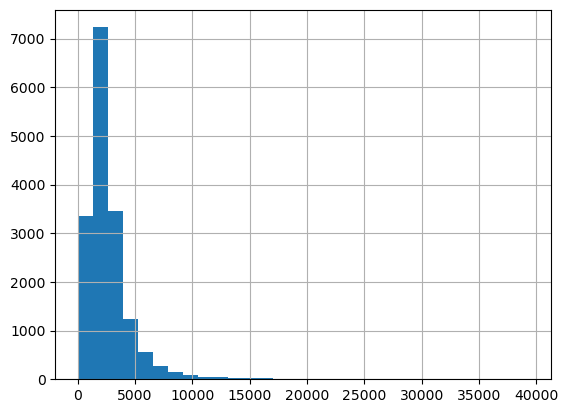

In [93]:
train_features_numeric["total_rooms"].hist(bins=30)

<Axes: >

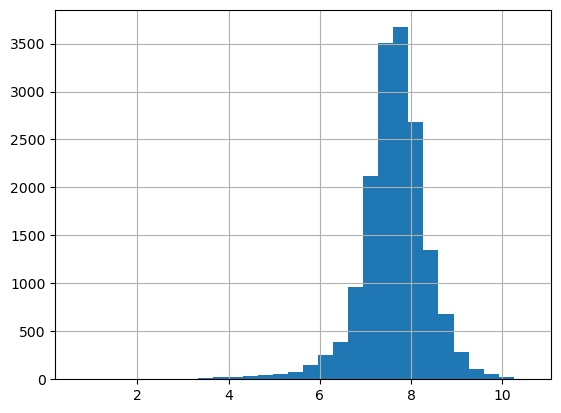

In [94]:
train_features_numeric["total_rooms"].apply(np.log).hist(bins=30)

In [95]:
from sklearn.metrics.pairwise import rbf_kernel

In [96]:
rbf_kernel(train_features_numeric[["housing_median_age"]], [[35]], gamma=0.1)

array([[7.44658307e-03],
       [4.57533877e-08],
       [1.00000000e+00],
       ...,
       [4.57533877e-08],
       [9.04837418e-01],
       [6.70320046e-01]])

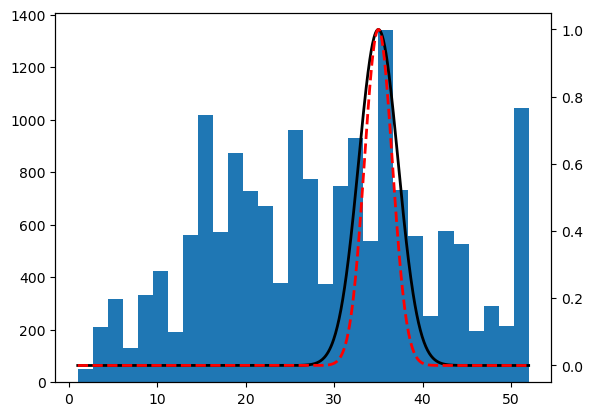

In [97]:
fig, ax = plt.subplots()
ax.hist(train_features_numeric["housing_median_age"], bins=30)

housing_ages = np.linspace(train_features_numeric["housing_median_age"].min(),
                           train_features_numeric["housing_median_age"].max(),
                           1000).reshape(-1, 1)

rbf1 = rbf_kernel(housing_ages, [[35]], gamma=0.1)
rbf2 = rbf_kernel(housing_ages, [[35]], gamma=0.2)

ax2 = ax.twinx()
ax2.plot(housing_ages, rbf1, color='black', lw=2);
ax2.plot(housing_ages, rbf2, color='red', lw=2, ls='--');

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
train_target.to_frame()

median_house_value
16415            158300.0
1279             253900.0
7741             209000.0
4425             137500.0
1283              93800.0
...                   ...
1221             104000.0
12640             75400.0
5747             354700.0
16224             84600.0
8967             336000.0

[16512 rows x 1 columns]

In [100]:
ss = StandardScaler()
target_values = ss.fit_transform(train_target.to_frame())
target_values

array([[-0.41979429],
       [ 0.41090161],
       [ 0.02075259],
       ...,
       [ 1.28678181],
       [-1.0601948 ],
       [ 1.12429213]])

In [101]:
model = LinearRegression()
model.fit(train_features_numeric[["median_income"]],
          target_values)

LinearRegression()

In [102]:
predictions = model.predict(train_features_numeric[["median_income"]].iloc[:5])

In [103]:
ss.inverse_transform(predictions)

array([[177436.32912486],
       [231100.4887263 ],
       [161400.49038824],
       [112429.4417594 ],
       [138397.98914116]])

In [104]:
from sklearn.compose import TransformedTargetRegressor

In [105]:
model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())

In [106]:
model.fit(train_features_numeric[["median_income"]],
          train_target.to_frame())

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=StandardScaler())

In [107]:
model.predict(train_features_numeric[["median_income"]].iloc[:5])

array([[177436.32912486],
       [231100.4887263 ],
       [161400.49038824],
       [112429.4417594 ],
       [138397.98914116]])

In [108]:
from sklearn.preprocessing import FunctionTransformer

In [109]:
logarithmic_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
logarithmic_transformer.transform(train_features_numeric[['population']])

population
16415    5.545177
1279     6.874198
7741     7.372746
4425     5.517453
1283     4.615121
...           ...
1221     7.201171
12640    6.784457
5747     6.715383
16224    7.465083
8967     6.621406

[16512 rows x 1 columns]

In [110]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args={"Y": [[35.0]], "gamma": 0.1})

In [111]:
rbf_transformer.transform(train_features_numeric[["housing_median_age"]])

array([[7.44658307e-03],
       [4.57533877e-08],
       [1.00000000e+00],
       ...,
       [4.57533877e-08],
       [9.04837418e-01],
       [6.70320046e-01]])

In [112]:
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.base import BaseEstimator, TransformerMixin

In [113]:
class CustomStandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self, hp=0):
        self.hp = hp

    def fit(self, X, y=None):
        X = check_array(X)
        self.mean_of_X = X.mean(axis=0)
        self.std_of_X = X.std(axis=0)
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self, X):
        check_is_fitted(self)
        assert self.n_features_in_ == X.shape[1]
        X = X - self.mean_of_X
        return X / self.std_of_X

In [114]:
css = CustomStandardScaler()
css.fit(train_features_numeric)

CustomStandardScaler()

In [115]:
css.transform(train_features_numeric)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16415  -0.847903  1.060690            1.065006    -1.003811       -1.068653   
1279   -1.037703  1.046606           -0.526863    -0.292922       -0.292301   
7741    0.705462 -0.784282            0.507852     0.056499        0.399665   
4425    0.660509 -0.727947           -0.128896    -1.115959       -1.099996   
1283   -1.127609  1.126414            1.383380    -1.137740       -1.189204   
...          ...       ...                 ...          ...             ...   
1221   -0.543224  1.248474           -0.606457     0.214989        0.349033   
12640  -0.942803  1.365838            0.428258    -0.342044       -0.292301   
5747    0.645525 -0.681001            1.542567    -0.496364       -0.617790   
16224  -0.882866  1.107636            0.587445     0.223331        0.095875   
8967    0.580594 -0.760809            0.667039    -0.508413       -0.670833   

       population  households  median_income  identifier  rooms_per_house  \
16415   -1.039117   -1.076980      -0.369087   -0.847609        -0.179382   
1279    -0.406831   -0.475183       0.309799   -1.037612         0.365122   
7741     0.148977    0.304237      -0.571951    0.705322        -0.404841   
4425    -1.045343   -1.106142      -1.191467    0.660385        -1.175258   
1283    -1.176958   -1.217487      -0.862948   -1.127521        -0.441398   
...           ...         ...            ...         ...              ...   
1221    -0.074235    0.123963      -0.914614   -0.542430         0.112548   
12640   -0.480642   -0.276351      -0.898940   -0.942278        -0.270037   
5747    -0.533110   -0.610388       0.865775    0.645436         0.169649   
16224    0.285928    0.118661      -0.215726   -0.882557         0.136098   
8967    -0.598918   -0.636899       0.829994    0.580356         0.223591   

       bedrooms_ratio  people_per_house  
16415       -0.227103         -0.028453  
1279        -0.095554         -0.003756  
7741         0.724325         -0.043119  
4425         2.519238         -0.002407  
1283         0.539619         -0.049343  
...               ...               ...  
1221         0.119464         -0.055669  
12640        0.105562         -0.075676  
5747        -0.581983          0.000376  
16224       -0.486081          0.013463  
8967        -0.777467         -0.014973  

[16512 rows x 12 columns]

## Pipeline

In [116]:
from sklearn.pipeline import Pipeline, make_pipeline

In [117]:
numerical_features_pipeline = Pipeline([
    ("MedianImputer", SimpleImputer(strategy="median")),
    ("MinMaxScaler", MinMaxScaler())
])

In [118]:
make_pipeline(
    SimpleImputer(strategy="median"),
    MinMaxScaler()
)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('minmaxscaler', MinMaxScaler())])

In [119]:
numerical_features_pipeline.fit_transform(train_features_numeric)

array([[0.30776892, 0.5674814 , 0.80392157, ..., 0.03154328, 0.11111111,
        0.00165807],
       [0.26992032, 0.5642933 , 0.41176471, ..., 0.04101175, 0.11955978,
        0.00187469],
       [0.61752988, 0.1498406 , 0.66666667, ..., 0.02762273, 0.17221617,
        0.00152942],
       ...,
       [0.60557769, 0.17321998, 0.92156863, ..., 0.03761264, 0.08831909,
        0.00191094],
       [0.30079681, 0.5781084 , 0.68627451, ..., 0.03702921, 0.09447835,
        0.00202573],
       [0.59262948, 0.15515409, 0.70588235, ..., 0.03855065, 0.07576416,
        0.0017763 ]])

In [120]:
from sklearn.compose import ColumnTransformer

In [121]:
train_features.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'identifier', 'rooms_per_house', 'bedrooms_ratio',
       'people_per_house'],
      dtype='object')

In [122]:
numerical_features = list(train_features.columns)
numerical_features.remove("ocean_proximity")
numerical_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'identifier',
 'rooms_per_house',
 'bedrooms_ratio',
 'people_per_house']

In [123]:
categorical_features = ["ocean_proximity"]

In [124]:
numerical_features_pipeline = Pipeline([
    ("MedianImputer", SimpleImputer(strategy="median")),
    ("MinMaxScaler", MinMaxScaler())
])

In [125]:
categorical_features_pipeline = Pipeline([
    ("MFImputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder())
])

In [126]:
total_transformation = ColumnTransformer([
    ("numerical", numerical_features_pipeline, numerical_features),
    ("categorical", categorical_features_pipeline, categorical_features)
])

In [127]:
total_transformation.fit_transform(train_features)

array([[0.30776892, 0.5674814 , 0.80392157, ..., 0.        , 0.        ,
        0.        ],
       [0.26992032, 0.5642933 , 0.41176471, ..., 0.        , 0.        ,
        0.        ],
       [0.61752988, 0.1498406 , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.60557769, 0.17321998, 0.92156863, ..., 0.        , 0.        ,
        0.        ],
       [0.30079681, 0.5781084 , 0.68627451, ..., 0.        , 0.        ,
        0.        ],
       [0.59262948, 0.15515409, 0.70588235, ..., 0.        , 0.        ,
        0.        ]])

In [128]:
total_transformation.get_feature_names_out()

array(['numerical__longitude', 'numerical__latitude',
       'numerical__housing_median_age', 'numerical__total_rooms',
       'numerical__total_bedrooms', 'numerical__population',
       'numerical__households', 'numerical__median_income',
       'numerical__identifier', 'numerical__rooms_per_house',
       'numerical__bedrooms_ratio', 'numerical__people_per_house',
       'categorical__ocean_proximity_<1H OCEAN',
       'categorical__ocean_proximity_INLAND',
       'categorical__ocean_proximity_ISLAND',
       'categorical__ocean_proximity_NEAR BAY',
       'categorical__ocean_proximity_NEAR OCEAN'], dtype=object)

In [129]:
# all of the transformation
train_data, test_data = train_test_split(df,
                                         test_size=0.2,
                                         stratify=df["median_income_categories"],
                                         random_state=42)

In [130]:
train_data = train_data.drop(columns="median_income_categories")
test_data = test_data.drop(columns="median_income_categories")

In [131]:
train_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   
...           ...         ...            ...                 ...   
15174      2026.0      1001.0         5.0900            268500.0   
12661      4769.0      1418.0         2.8139             90400.0   
19263       458.0       172.0         3.1797            140400.0   
19140      1208.0       501.0         4.1964            258100.0   
19773       625.0       197.0         3.1319             62700.0   

      ocean_proximity  identifier  
12655          INLAND  -121421.48  
15502      NEAR OCEAN  -117196.91  
2908           INLAND  -119004.63  
14053      NEAR OCEAN  -117097.25  
20496       <1H OCEAN  -118665.72  
...               ...         ...  
15174       <1H OCEAN  -117036.97  
12661          INLAND  -121381.49  
19263       <1H OCEAN  -122681.56  
19140       <1H OCEAN  -122661.69  
19773          INLAND  -122100.03  

[16512 rows x 11 columns]

In [132]:
heavy_tail_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

In [133]:
categorical_features_pipeline = Pipeline([
    ("MFImputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder())
])

In [134]:
housing_median_age_rbf_transformer = FunctionTransformer(rbf_kernel,
                                                         feature_names_out="one-to-one",
                                                         kw_args={"Y": [[35.0]],
                                                                  "gamma": 0.1})

In [135]:
default_numerical_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [136]:
def ratio_of_columns(X):
  return X[:, [0]] / X[:, [1]]

def ratio_of_columns_name(function_transformer, feature_names_in):
  return ["ratio"]

def ratio_of_columns_pipeline():
  return make_pipeline(
      SimpleImputer(strategy="median"),
      FunctionTransformer(ratio_of_columns,
                          feature_names_out=ratio_of_columns_name),
      StandardScaler()

  )

In [137]:
all_transformations = ColumnTransformer([
    ("bedrooms", ratio_of_columns_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_of_columns_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_of_columns_pipeline(), ["population", "households"]),
    ("log", heavy_tail_pipeline, ["total_bedrooms", "total_rooms",
                                  "population", "households", "median_income"]),
    ("rbf", housing_median_age_rbf_transformer, ["housing_median_age"]),
    ("cat", categorical_features_pipeline, ["ocean_proximity"])

],
remainder=default_numerical_pipeline)

In [138]:
train_data, test_data = train_test_split(df,
                                         test_size=0.2,
                                         stratify=df["median_income_categories"],
                                         random_state=40)

In [139]:
train_data = train_data.drop(columns=["median_income_categories", "identifier"])
test_data = test_data.drop(columns=["median_income_categories", "identifier"])

In [140]:
train_features = train_data.drop(columns="median_house_value")
train_target = train_data["median_house_value"]

test_features = test_data.drop(columns="median_house_value")
test_target = test_data["median_house_value"]

In [141]:
train_features

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16415    -121.26     37.88                42.0        465.0            93.0   
1279     -121.64     37.85                22.0       1999.0           415.0   
7741     -118.15     33.95                35.0       2753.0           702.0   
4425     -118.24     34.07                27.0        223.0            80.0   
1283     -121.82     38.02                46.0        176.0            43.0   
...          ...       ...                 ...          ...             ...   
1221     -120.65     38.28                21.0       3095.0           681.0   
12640    -121.45     38.53                34.0       1893.0           415.0   
5747     -118.27     34.17                48.0       1560.0           280.0   
16224    -121.33     37.98                36.0       3113.0           576.0   
8967     -118.40     34.00                37.0       1534.0           258.0   

       population  households  median_income ocean_proximity  
16415       256.0        93.0         3.1719          INLAND  
1279        967.0       320.0         4.4583          INLAND  
7741       1592.0       614.0         2.7875       <1H OCEAN  
4425        249.0        82.0         1.6136       <1H OCEAN  
1283        101.0        40.0         2.2361          INLAND  
...           ...         ...            ...             ...  
1221       1341.0       546.0         2.1382          INLAND  
12640       884.0       395.0         2.1679          INLAND  
5747        825.0       269.0         5.5118       <1H OCEAN  
16224      1746.0       544.0         3.4625          INLAND  
8967        751.0       259.0         5.4440       <1H OCEAN  

[16512 rows x 9 columns]

In [142]:
train_features_transformed = all_transformations.fit_transform(train_features)

In [143]:
train_features_transformed.shape

(16512, 16)

In [144]:
all_transformations.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'rbf__housing_median_age',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__longitude',
       'remainder__latitude'], dtype=object)

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
linear_regression_pipeline = make_pipeline(all_transformations,
                                           LinearRegression())

In [147]:
linear_regression_pipeline.fit(train_features,
                               train_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_of_columns_...
                                                   'households',
                                                   'median_income']),
                                                 ('rbf',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function rbf_kernel at 0x7effd24f7eb0>,
                                                                      kw_args={'Y': [[35.0]],
                                                                               'gamma': 0.1}),
                                                  ['housing_median_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('MFImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

In [148]:
linear_regression_pipeline.predict(train_features).shape

(16512,)

In [149]:
house_value_prediction = linear_regression_pipeline.predict(train_features)

In [150]:
house_value_prediction

array([151110.09075875, 201490.43908191, 203196.66863746, ...,
       277963.22776272, 140863.66957838, 289470.80942827])

In [151]:
train_target.values

array([158300., 253900., 209000., ..., 354700.,  84600., 336000.])

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [153]:
mean_absolute_error(train_target.values,
                    house_value_prediction)

53721.05707553124

In [154]:
mean_squared_error(train_target.values,
                   house_value_prediction)

5169319861.141136

In [155]:
mean_squared_error(train_target.values,
                   house_value_prediction,
                   squared=False)   # UnderFit

71897.98231620368

In [156]:
r2_score(train_target.values,
         house_value_prediction)

0.6096971144272171

In [157]:
from sklearn.tree import DecisionTreeRegressor

In [158]:
dt_regression_pipeline = make_pipeline(all_transformations,
                                       DecisionTreeRegressor())

In [159]:
dt_regression_pipeline.fit(train_features,
                           train_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_of_columns_...
                                                   'median_income']),
                                                 ('rbf',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function rbf_kernel at 0x7effd24f7eb0>,
                                                                      kw_args={'Y': [[35.0]],
                                                                               'gamma': 0.1}),
                                                  ['housing_median_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('MFImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [160]:
mean_squared_error(train_target.values,
                   dt_regression_pipeline.predict(train_features))

0.0

In [161]:
r2_score(train_target.values,
         dt_regression_pipeline.predict(train_features))    # OverFit

1.0

In [162]:
from sklearn.model_selection import cross_val_score

In [163]:
dt_mae = - cross_val_score(dt_regression_pipeline,
                           train_features,
                           train_target,
                           scoring="neg_mean_absolute_error",
                           cv=5)

In [165]:
pd.Series(dt_mae).describe()

count        5.000000
mean     46180.642510
std       1045.890324
min      44859.503179
25%      45342.664547
50%      46487.536644
75%      46863.463356
max      47350.044821
dtype: float64

In [166]:
from sklearn.model_selection import GridSearchCV

### Method 1

In [167]:
param_grid = {"max_depth": [5, 10, 15]}

In [170]:
gs = GridSearchCV(estimator=DecisionTreeRegressor(),
                  param_grid=param_grid,
                  scoring="neg_mean_absolute_error",
                  cv=5)

In [171]:
gs.fit(train_features_transformed,
       train_target)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15]},
             scoring='neg_mean_absolute_error')

In [172]:
gs.best_params_

{'max_depth': 10}

In [ ]:
# gs.predict()

### Method 2

In [185]:
dt_regression_pipeline = Pipeline([
    ("transformation", all_transformations),
    ("dtr", DecisionTreeRegressor())
    ])

In [187]:
gs = GridSearchCV(dt_regression_pipeline,
                  param_grid,
                  scoring="neg_mean_absolute_error",
                  cv=5)

In [188]:
gs.fit(train_features, train_target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformation',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<...
                                                                                                      'gamma': 0.1}),
                                                                         ['housing_median_age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('MFImputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['ocean_proximity'])])),
                                       ('dtr', DecisionTreeRegressor())]),
             param_grid={'dtr__max_depth': [5, 10, 15],
                         'transformation__rbf__kw_args': [{'Y': [[35.0]],
                                                           'gamma': 0.1},
                                                          {'Y': [[35.0]],
                                                           'gamma': 0.2}]},
             scoring='neg_mean_absolute_error')

In [192]:
gs.best_params_

{'dtr__max_depth': 10,
 'transformation__rbf__kw_args': {'Y': [[35.0]], 'gamma': 0.2}}

In [195]:
pd.DataFrame(gs.cv_results_).sort_values(by="mean_test_score",
                                         ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3       0.166304      0.021324         0.014469        0.002524   
2       0.167812      0.011190         0.013826        0.000814   
4       0.257487      0.033079         0.018199        0.005687   
5       0.200120      0.003917         0.012040        0.000699   
0       0.111752      0.009987         0.013217        0.001592   
1       0.098692      0.003591         0.012165        0.000417   

  param_dtr__max_depth param_transformation__rbf__kw_args  \
3                   10      {'Y': [[35.0]], 'gamma': 0.2}   
2                   10      {'Y': [[35.0]], 'gamma': 0.1}   
4                   15      {'Y': [[35.0]], 'gamma': 0.1}   
5                   15      {'Y': [[35.0]], 'gamma': 0.2}   
0                    5      {'Y': [[35.0]], 'gamma': 0.1}   
1                    5      {'Y': [[35.0]], 'gamma': 0.2}   

                                              params  split0_test_score  \
3  {'dtr__max_depth': 10, 'transformation__rbf__k...      -40453.558080   
2  {'dtr__max_depth': 10, 'transformation__rbf__k...      -40880.799468   
4  {'dtr__max_depth': 15, 'transformation__rbf__k...      -42229.881590   
5  {'dtr__max_depth': 15, 'transformation__rbf__k...      -42200.431944   
0  {'dtr__max_depth': 5, 'transformation__rbf__kw...      -49737.765365   
1  {'dtr__max_depth': 5, 'transformation__rbf__kw...      -49737.765365   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
3      -41270.802421      -41434.283747      -41646.621502      -41882.251454   
2      -41913.386113      -41429.386093      -41766.472728      -41654.823479   
4      -43268.144191      -44505.329174      -43555.767454      -44055.145025   
5      -43428.688681      -44283.966119      -43600.578458      -44146.880159   
0      -48366.315749      -48753.392626      -48695.095113      -48113.260821   
1      -48366.315749      -48753.392626      -48695.095113      -48113.260821   

   mean_test_score  std_test_score  rank_test_score  
3    -41337.503441      487.335455                1  
2    -41528.973576      360.572984                2  
4    -43522.853487      772.829766                3  
5    -43532.109072      739.186081                4  
0    -48733.165935      553.161808                5  
1    -48733.165935      553.161808                5

In [196]:
housing_model = gs.best_estimator_

In [200]:
housing_model["dtr"].feature_importances_.round(3)

array([0.014, 0.017, 0.117, 0.003, 0.005, 0.004, 0.005, 0.541, 0.01 ,
       0.   , 0.169, 0.   , 0.   , 0.   , 0.065, 0.049])

In [201]:
sorted(zip(housing_model["dtr"].feature_importances_.round(3),
       housing_model["transformation"].get_feature_names_out()),
       reverse=True)

[(0.541, 'log__median_income'),
 (0.169, 'cat__ocean_proximity_INLAND'),
 (0.117, 'people_per_house__ratio'),
 (0.065, 'remainder__longitude'),
 (0.049, 'remainder__latitude'),
 (0.017, 'rooms_per_house__ratio'),
 (0.014, 'bedrooms__ratio'),
 (0.01, 'rbf__housing_median_age'),
 (0.005, 'log__total_rooms'),
 (0.005, 'log__households'),
 (0.004, 'log__population'),
 (0.003, 'log__total_bedrooms'),
 (0.0, 'cat__ocean_proximity_NEAR OCEAN'),
 (0.0, 'cat__ocean_proximity_NEAR BAY'),
 (0.0, 'cat__ocean_proximity_ISLAND'),
 (0.0, 'cat__ocean_proximity_<1H OCEAN')]

In [202]:
mean_squared_error(test_target,
                   housing_model.predict(test_features),
                   squared=False)

61821.34143094407

In [203]:
from scipy import stats

In [204]:
ci = 0.95

In [205]:
se = (test_target - housing_model.predict(test_features)) ** 2

In [207]:
np.sqrt(stats.t.interval(ci,
                         len(se)-1,
                         loc=np.mean(se),
                         scale=stats.sem(se)))

array([59069.90239289, 64455.43533277])

In [208]:
import joblib

In [209]:
joblib.dump(housing_model, "./out/housing_model.pkl")

['./out/housing_model.pkl']

In [210]:
housing_model_loaded = joblib.load("./out/housing_model.pkl")